Association_Rules:- 
The Objective of this assignment is to introduce students to rule mining techniques, particularly focusing on market basket analysis and provide hands on experience.
Dataset:
Use the Online retail dataset to apply the association rules.
Data Preprocessing:
Pre-process the dataset to ensure it is suitable for Association rules, this may include handling missing values, removing duplicates, and converting the data to appropriate format.  
Association Rule Mining:
Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend etc.
 Apply association rule mining techniques to the pre-processed dataset to discover interesting relationships between products purchased together.
Set appropriate threshold for support, confidence and lift to extract meaning full rules.
Analysis and Interpretation:
Analyse the generated rules to identify interesting patterns and relationships between the products.
Interpret the results and provide insights into customer purchasing behaviour based on the discovered rules.


In [1]:
import pandas as pd 

In [2]:
Data=pd.read_excel("Online retail.xlsx")
Data

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt
...,...
7495,"butter,light mayo,fresh bread"
7496,"burgers,frozen vegetables,eggs,french fries,ma..."
7497,chicken
7498,"escalope,green tea"


In [3]:
# Renaming the column
Data.rename(columns={'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil':'Product_List'},inplace=True)

In [4]:
# displaing the data after renaming it 
Data.head()
# Data Description 
Data.describe()

,Product_List
count,7500
unique,5175
top,cookies
freq,223


In [5]:
# Handle mising values 
Data.isnull().sum()

Product_List    0
dtype: int64

In [6]:
# Verify duplicates values 
Data.duplicated().sum()

# drop the duplicates 
Data.drop_duplicates(inplace=True)

In [8]:
# Convert the data into a list of transactions
transactions = Data['Product_List'].apply(lambda x: x.split(','))

In [9]:
!pip install mlxtend

In [18]:
# One-hot encode the transactions
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

# convert the product into list of transactions 
tran_encode=TransactionEncoder()
transa=tran_encode.fit_transform(transactions)

# Convert the list into dataframe
df=pd.DataFrame(transa,columns=tran_encode.columns_)


In [22]:
# Generate Apriori Algorithm with minimum_support of 1% 
frequent_items=apriori(df,min_support=0.01,use_colnames=True)
frequent_items

,support,itemsets
0,0.029179,(almonds)
1,0.011014,(antioxydant juice)
2,0.045797,(avocado)
3,0.012560,(bacon)
4,0.015459,(barbecue sauce)
...,...,...
431,0.014686,"(mineral water, spaghetti, olive oil)"
432,0.016618,"(pancakes, mineral water, spaghetti)"
433,0.012367,"(mineral water, shrimp, spaghetti)"
434,0.010821,"(mineral water, soup, spaghetti)"


In [83]:
# Applying the Association rules  with minimum_threshold of 20%
Association=association_rules(frequent_items,min_threshold=0.2,metric="lift")
Association

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(almonds),0.299710,0.029179,0.010821,0.036106,1.237399,0.002076,1.007186,0.273962
1,(almonds),(mineral water),0.029179,0.299710,0.010821,0.370861,1.237399,0.002076,1.113092,0.197619
2,(chocolate),(avocado),0.205217,0.045797,0.010242,0.049906,1.089716,0.000843,1.004325,0.103588
3,(avocado),(chocolate),0.045797,0.205217,0.010242,0.223629,1.089716,0.000843,1.023715,0.086281
4,(avocado),(french fries),0.045797,0.192657,0.011594,0.253165,1.314069,0.002771,1.081019,0.250476
...,...,...,...,...,...,...,...,...,...,...
953,"(mineral water, spaghetti)",(tomatoes),0.085024,0.091981,0.013527,0.159091,1.729612,0.005706,1.079807,0.461035
954,"(tomatoes, spaghetti)",(mineral water),0.029952,0.299710,0.013527,0.451613,1.506832,0.004550,1.276999,0.346742
955,(mineral water),"(tomatoes, spaghetti)",0.299710,0.029952,0.013527,0.045132,1.506832,0.004550,1.015898,0.480310
956,(tomatoes),"(mineral water, spaghetti)",0.091981,0.085024,0.013527,0.147059,1.729612,0.005706,1.072730,0.464567


In [97]:
# Display rules sorted by 'Confidence'
Rules=Association.sort_values(by='confidence',ascending=False)
# Display the top 10 rules
Rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
912,"(soup, milk)",(mineral water),0.021449,0.299710,0.012367,0.576577,1.923781,0.005939,1.653876,0.490716
827,"(frozen vegetables, ground beef)",(mineral water),0.024541,0.299710,0.013333,0.543307,1.812775,0.005978,1.533393,0.459640
948,"(soup, spaghetti)",(mineral water),0.020676,0.299710,0.010821,0.523364,1.746235,0.004624,1.469236,0.436362
881,"(ground beef, pancakes)",(mineral water),0.020870,0.299710,0.010821,0.518519,1.730067,0.004566,1.454448,0.430982
599,"(chocolate, chicken)",(mineral water),0.021256,0.299710,0.011014,0.518182,1.728943,0.004644,1.453432,0.430768
894,"(milk, olive oil)",(mineral water),0.024155,0.299710,0.012367,0.512000,1.708317,0.005128,1.435020,0.424892
833,"(frozen vegetables, ground beef)",(spaghetti),0.024541,0.229565,0.012560,0.511811,2.229480,0.006927,1.578149,0.565339
707,"(chocolate, olive oil)",(mineral water),0.023575,0.299710,0.011981,0.508197,1.695627,0.004915,1.423923,0.420153
869,"(ground beef, milk)",(mineral water),0.031691,0.299710,0.016039,0.506098,1.688623,0.006541,1.417871,0.421148
779,"(ground beef, eggs)",(mineral water),0.028792,0.299710,0.014493,0.503356,1.679475,0.005863,1.410043,0.416570


In [98]:
# Interpretation of the top rules 
for index,rule in Rules.head(10).iterrows():
    antecedents=','.join(list(rule['antecedents']))
    consequents=','.join(list(rule['consequents']))
    print(f'Rule: If a customer buys {antecedents}, they are likely to buy {consequents}')
    print(f'-Support:{rule["support"]:.4f}')
    print(f'-Confidence:{rule["confidence"]:.4f}')
    print(f'-Lift:{rule["lift"]:.4f}')
    print('---------------------------------')

Rule: If a customer buys soup,milk, they are likely to buy mineral water
-Support:0.0124
-Confidence:0.5766
-Lift:1.9238
---------------------------------
Rule: If a customer buys frozen vegetables,ground beef, they are likely to buy mineral water
-Support:0.0133
-Confidence:0.5433
-Lift:1.8128
---------------------------------
Rule: If a customer buys soup,spaghetti, they are likely to buy mineral water
-Support:0.0108
-Confidence:0.5234
-Lift:1.7462
---------------------------------
Rule: If a customer buys ground beef,pancakes, they are likely to buy mineral water
-Support:0.0108
-Confidence:0.5185
-Lift:1.7301
---------------------------------
Rule: If a customer buys chocolate,chicken, they are likely to buy mineral water
-Support:0.0110
-Confidence:0.5182
-Lift:1.7289
---------------------------------
Rule: If a customer buys milk,olive oil, they are likely to buy mineral water
-Support:0.0124
-Confidence:0.5120
-Lift:1.7083
---------------------------------
Rule: If a customer b

# Data Visualizations 

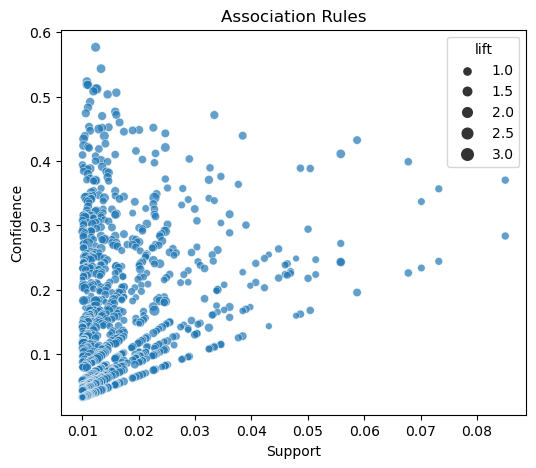

In [99]:
# Plotting the support, confidence, and lift of the rules
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(6,5))
sns.scatterplot(x='support',y='confidence',size='lift',data=Rules,alpha=0.7)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

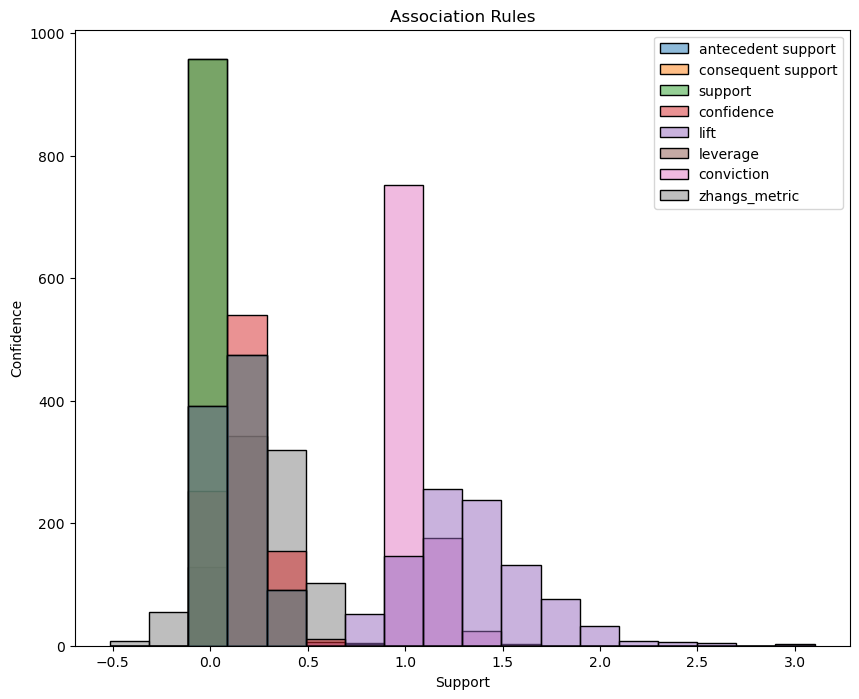

In [100]:
plt.figure(figsize=(10,8))
sns.histplot(data=Rules,bins=18)
plt.title('Association Rules')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

# Analysis and Interpretation:- 
1.Rule :- If a customer buys soup,milk they are likely to buy mineral water
-Support:0.0124
-Confidence:0.5766
-Lift:1.9238
-Interpretations: 12% of all the transactions include (soup,milk) and mineral water . When soup , milk are bought , there is 57% of chances that mineral water will also be bought.Customers who buy soup,milk are 1.9 times more likely to buy mineral water compared to those who dont buy soup,milk.


---------------------------------------------------------------------------------------------------------------------
2. Rule: If a customer buys frozen vegetables,ground beef, they are likely to buy spaghetti
-Support:0.0126
-Confidence:0.5118
-Lift:2.2295
-Interpretations: 12% of all the transactions include (frozen vegetables,ground beef) and spaghetti.When frozen vegetables,ground beef are bought,there is 51% of chances that spaghetti will also be bought.Customers who buy frozen vegetables,ground beef are 2.2 times more likely to buy spaghetti compared to those who dont buy frozen vegetables,ground beef.